In [83]:
# Import library
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Read file
data = pd.read_csv('Dataset/Superstore Sales Dataset.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Data Cleaning

In [86]:
# Duplicate Check
data.duplicated().sum()

0

In [87]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [88]:
# Drop missing value
data = data.dropna(subset=['Postal Code'])

In [89]:
# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'],format='%d/%m/%Y', errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'],format='%d/%m/%Y', errors='coerce')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

# EDA

## Analyze Sales Trends Over Time

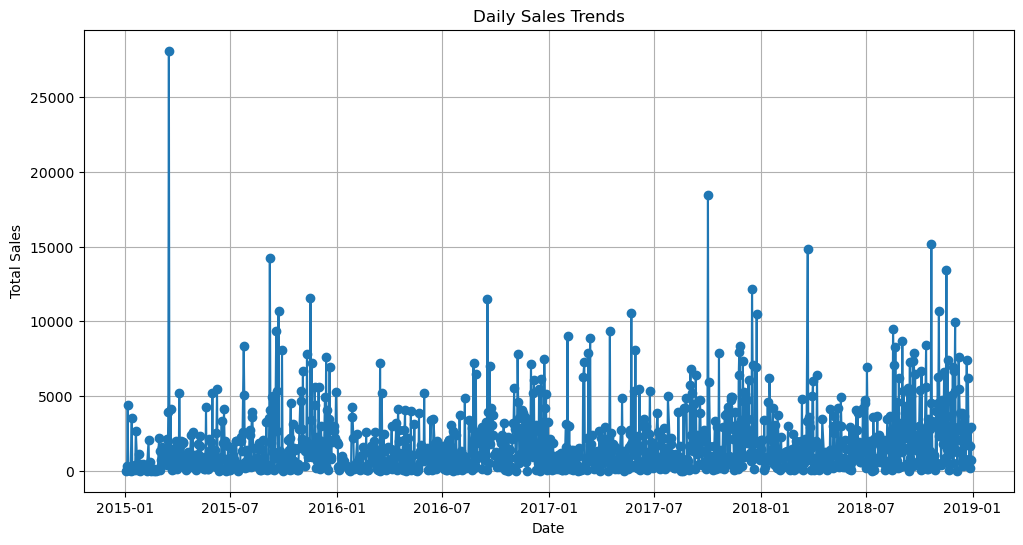

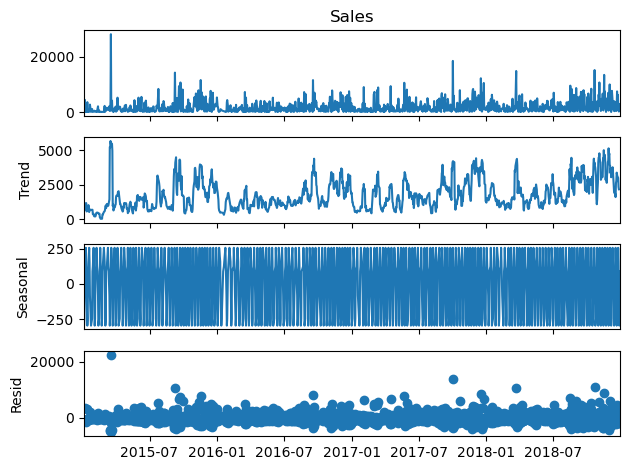

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate daily sales
daily_sales = data.groupby('Order Date')['Sales'].sum()

# Plot daily sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Decompose time series to see trend, seasonality, and residuals
decomposition = seasonal_decompose(daily_sales, model='additive', period=7)  # Assuming weekly seasonality
decomposition.plot()
plt.show()


## Analyze Seasonality

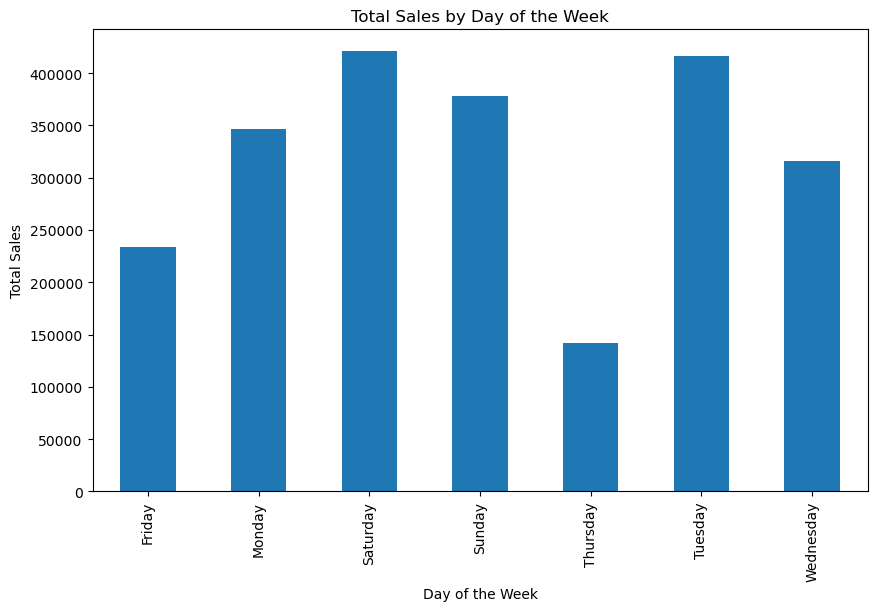

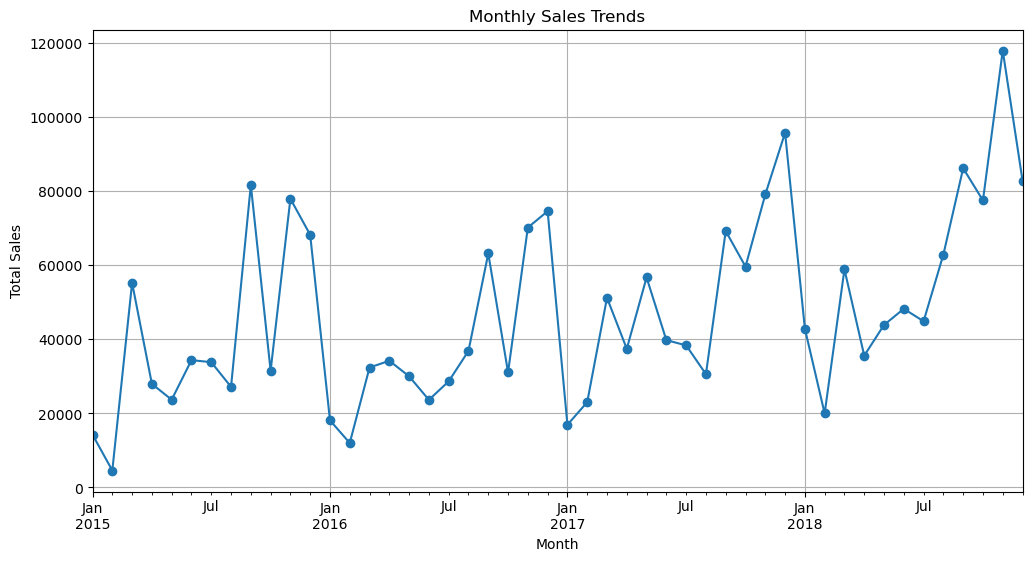

In [92]:
# Extract day of the week
data['Order Day'] = data['Order Date'].dt.day_name()

# Group sales by day of the week
day_sales = data.groupby('Order Day')['Sales'].sum()

# Plot sales by day of the week
day_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()

# Aggregate sales by month for long-term seasonality
data['Order Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Order Month')['Sales'].sum()

# Plot monthly sales trends
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


## Analyze Categorical Features

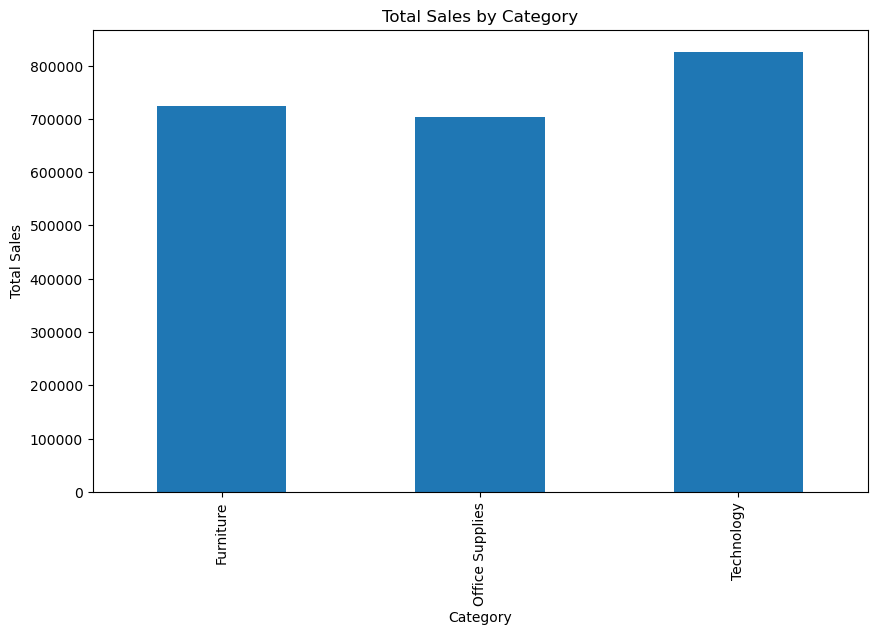

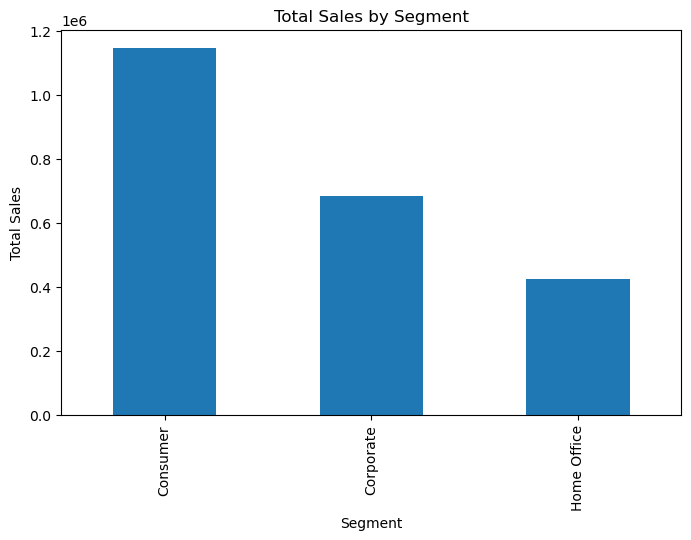

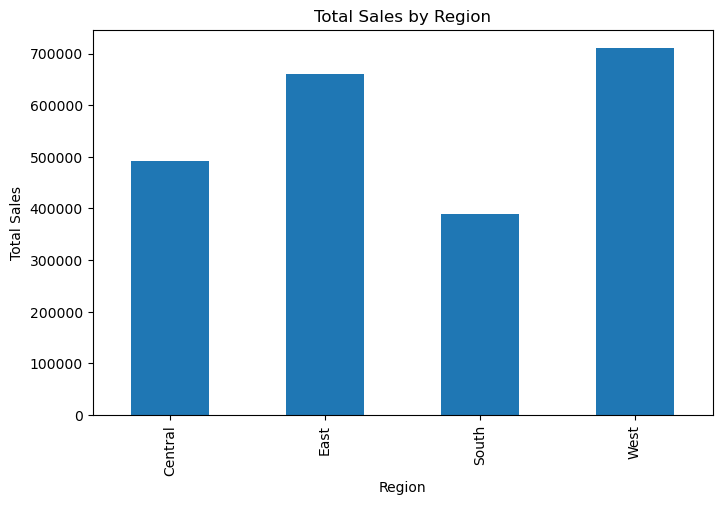

In [93]:
# Total sales by Category
category_sales = data.groupby('Category')['Sales'].sum()

# Plot sales by Category
category_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Total sales by Segment
segment_sales = data.groupby('Segment')['Sales'].sum()

# Plot sales by Segment
segment_sales.plot(kind='bar', figsize=(8, 5))
plt.title("Total Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.show()

# Total sales by Region
region_sales = data.groupby('Region')['Sales'].sum()

# Plot sales by Region
region_sales.plot(kind='bar', figsize=(8, 5))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


## Analyze Distribution of Sales

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64


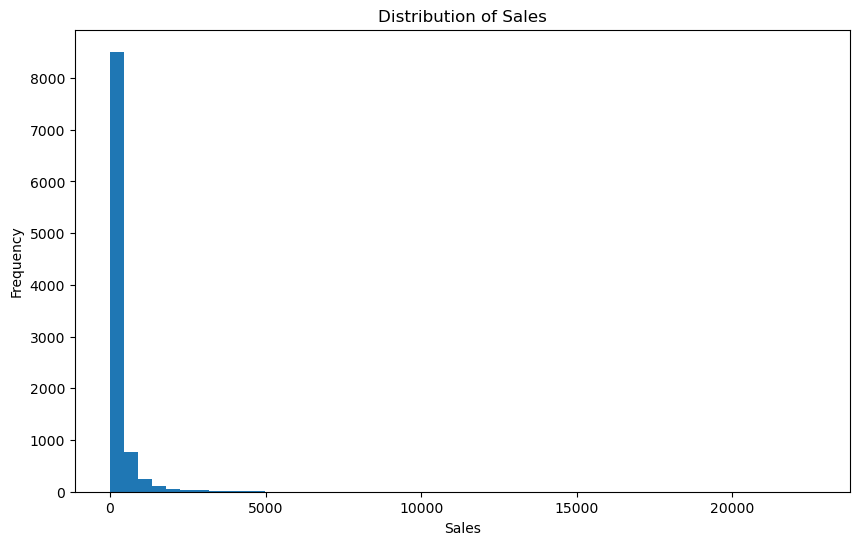

In [94]:
# Statistical summary of sales
print(data['Sales'].describe())

# Plot distribution of sales
data['Sales'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


# Modelling

In [95]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

In [96]:
# Aggregate daily sales
daily_sales = data.groupby('Order Date')['Sales'].sum()

# Convert Series to DataFrame
daily_sales = daily_sales.to_frame().reset_index()

# Ensure the data is sorted by date
daily_sales = daily_sales.sort_values('Order Date')

# Reset index
daily_sales = daily_sales.reset_index(drop=True)


In [97]:
# Normalize sales data
scaler = MinMaxScaler(feature_range=(0, 1))
daily_sales['Normalized Sales'] = scaler.fit_transform(daily_sales[['Sales']])


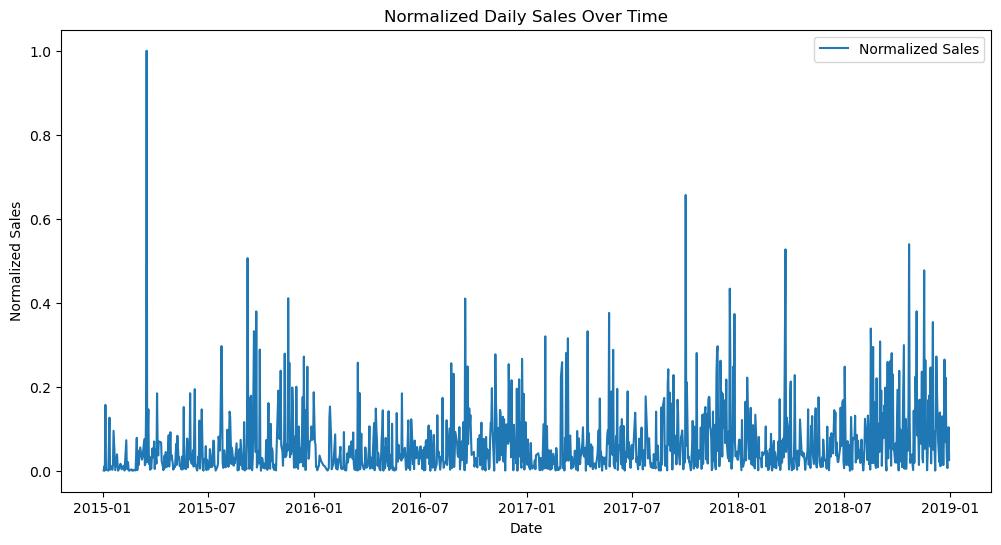

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Normalized Sales'], label="Normalized Sales")
plt.title("Normalized Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Sales")
plt.legend()
plt.show()


In [99]:
# Define a function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])  # Sequence of n_steps days
        y.append(data[i + n_steps])   # The next day
    return np.array(X), np.array(y)

# Set the number of steps (e.g., 7 days)
n_steps = 7

# Prepare sequences
X, y = create_sequences(daily_sales['Normalized Sales'].values, n_steps)


In [100]:
# Split data
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [101]:
# Reshape input data to 3D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [102]:
# Build LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\ADVAN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0057 - val_loss: 0.0078
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0080
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0079
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - val_loss: 0.0076
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0078
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0077
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0076
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_l

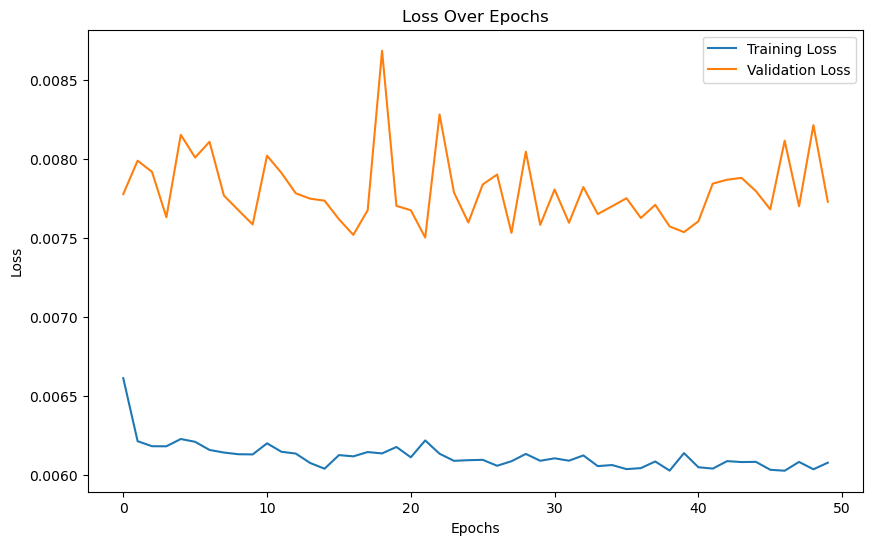

In [103]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [104]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values to get original sales values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1710.0634849035398
Root Mean Squared Error (RMSE): 2470.41796322884


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error (MAE): 1710.0634849035398
Root Mean Squared Error (RMSE): 2470.41796322884


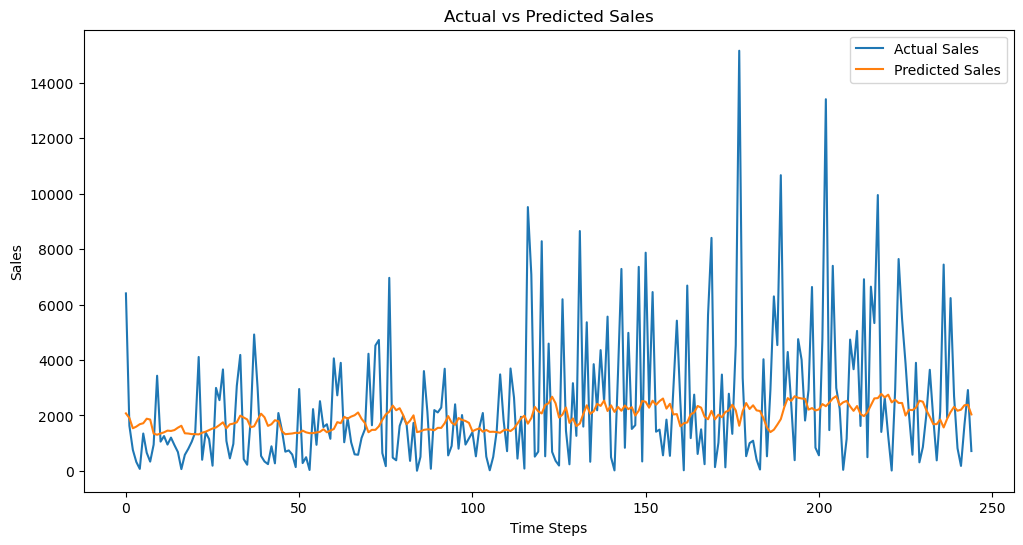

In [106]:
# Prepare data
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions
y_pred = model.predict(X_test)

# Rescale predictions back to the original scale
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_original)), y_test_original, label="Actual Sales")
plt.plot(range(len(y_pred_original)), y_pred_original, label="Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time Steps")
plt.ylabel("Sales")
plt.legend()
plt.show()


# Feature engineering

In [107]:
# Add temporal features
daily_sales['day_of_week'] = daily_sales['Order Date'].dt.dayofweek
daily_sales['month'] = daily_sales['Order Date'].dt.month
daily_sales['quarter'] = daily_sales['Order Date'].dt.quarter
daily_sales['year'] = daily_sales['Order Date'].dt.year

# Add lag features
daily_sales['lag_1'] = daily_sales['Sales'].shift(1)
daily_sales['lag_7'] = daily_sales['Sales'].shift(7)
daily_sales['lag_14'] = daily_sales['Sales'].shift(14)

# Add rolling statistics
daily_sales['rolling_mean_7'] = daily_sales['Sales'].rolling(window=7).mean()
daily_sales['rolling_std_7'] = daily_sales['Sales'].rolling(window=7).std()

# Add momentum features
daily_sales['delta_sales'] = daily_sales['Sales'].diff()
daily_sales['delta_pct'] = daily_sales['Sales'].pct_change()

# Add cumulative features
daily_sales['cumulative_sales'] = daily_sales['Sales'].cumsum()

# Drop rows with NaN values (due to lag/rolling calculations)
daily_sales = daily_sales.dropna()
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, 14 to 1228
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        1215 non-null   datetime64[ns]
 1   Sales             1215 non-null   float64       
 2   Normalized Sales  1215 non-null   float64       
 3   day_of_week       1215 non-null   int32         
 4   month             1215 non-null   int32         
 5   quarter           1215 non-null   int32         
 6   year              1215 non-null   int32         
 7   lag_1             1215 non-null   float64       
 8   lag_7             1215 non-null   float64       
 9   lag_14            1215 non-null   float64       
 10  rolling_mean_7    1215 non-null   float64       
 11  rolling_std_7     1215 non-null   float64       
 12  delta_sales       1215 non-null   float64       
 13  delta_pct         1215 non-null   float64       
 14  cumulative_sales  1215 non-n

# Other model

In [110]:
from prophet import Prophet

# Prepare the data
prophet_data = daily_sales[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_data)


22:46:13 - cmdstanpy - INFO - Chain [1] start processing
22:46:13 - cmdstanpy - INFO - Chain [1] done processing


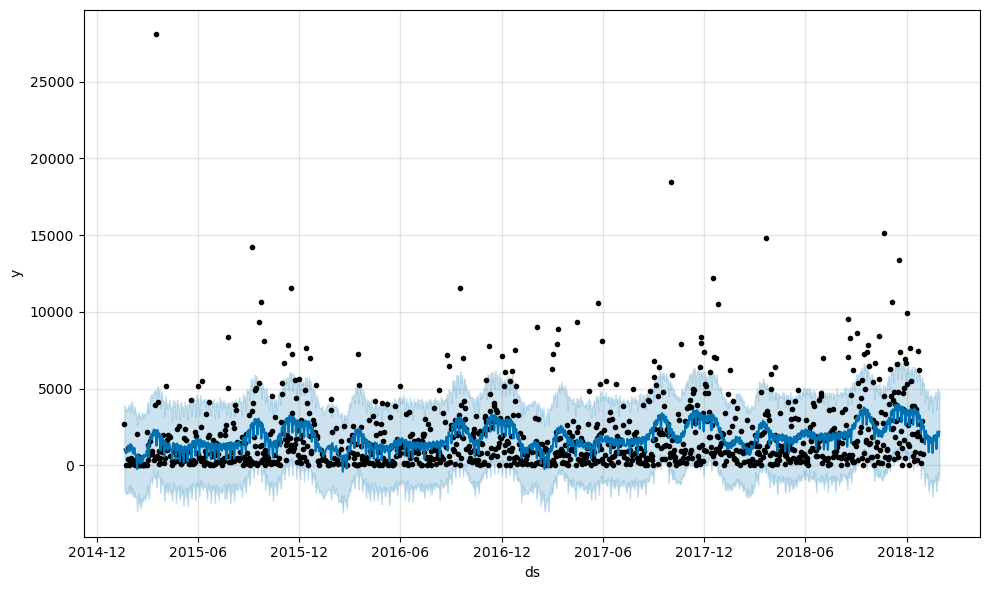

In [111]:
# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()


In [112]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds         yhat   yhat_lower   yhat_upper
0    2015-01-20  1039.741546 -1600.223623  3918.649616
1    2015-01-23   779.038726 -1874.913080  3529.563042
2    2015-01-26   962.450763 -1861.922878  3708.320307
3    2015-01-27  1292.449644 -1352.934605  3902.448147
4    2015-01-28   897.462478 -1683.941944  3726.385789
...         ...          ...          ...          ...
1240 2019-01-25  1723.189086  -902.225301  4386.951315
1241 2019-01-26  2201.923309  -466.832632  4960.956318
1242 2019-01-27  1988.274055  -904.168277  4511.155416
1243 2019-01-28  1880.782002  -973.994068  4609.514129
1244 2019-01-29  2197.902253  -487.970408  4846.690371

[1245 rows x 4 columns]


In [114]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_sales['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")


ADF Statistic: -5.804568112093844
P-value: 4.5481167905662467e-07


In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(daily_sales['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = model.fit()

# Forecast
forecast = sarima_result.forecast(steps=30)
print(forecast)


c:\Users\ADVAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADVAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1215    3253.957063
1216    3443.795931
1217    3043.121013
1218    2749.777694
1219    2526.913133
1220    2952.628374
1221    3017.621775
1222    3217.552562
1223    3495.717931
1224    3159.708728
1225    2881.914543
1226    2581.479649
1227    2969.268968
1228    3137.530960
1229    3230.844671
1230    3513.034041
1231    3179.970895
1232    2902.885102
1233    2598.916238
1234    2984.977719
1235    3157.944448
1236    3246.400871
1237    3528.773566
1238    3195.844638
1239    2918.791118
1240    2614.661253
1241    3000.644016
1242    3173.825085
1243    3262.060218
1244    3544.441266
Name: predicted_mean, dtype: float64


c:\Users\ADVAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ADVAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
